<a href="https://colab.research.google.com/github/sharanbalu/Custemore_conversion-prediction/blob/main/Customer_conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**About Dataset**
The dataset belongs to  bank loan prediction, based on the customer conversation should predict either to give a loan or not to give loan



# **Import Libraries**


In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score, roc_auc_score,f1_score, confusion_matrix

**Reading dataset**

In [233]:
df=pd.read_csv('/content/Customer Conversion Prediction - Customer Conversion Prediction.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


**copying original dataset for safety**

In [234]:
data=df

#**Preprocessing & EDA**

**Original dataset**

In [235]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [236]:
df.drop_duplicates()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [238]:
df.shape

(45211, 11)

In [239]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


#**Dealing with Unknown values in dataset**

1. **Above lines shows that the Dataset is perfectly good , no Null values**
2. **But we can see the Unknown values in the some columns**
3. **So that,should work on Unknown values**

**Renaming feature**
1. ReNaming the **'y'** column as **target**
2. and conevrting categorical values into **numeric values**

In [240]:
df['target'] = pd.Categorical(df['y']).codes

df.drop('y',axis=1,inplace=True)

1. The dataset contains the unknown nvalues in categorical colunms, So
2. Assumed that the unknown value as missing or NaN values
3. **Replacing the Unknown value as NaN**

In [241]:
#Replaced the Unknown value as  NaN
df.replace('unknown', np.nan, inplace=True)

In [242]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,management,married,tertiary,NaN,5,may,261,1,NaN,0
1,44,technician,single,secondary,NaN,5,may,151,1,NaN,0
2,33,entrepreneur,married,secondary,NaN,5,may,76,1,NaN,0
3,47,blue-collar,married,NaN,NaN,5,may,92,1,NaN,0
4,33,NaN,single,NaN,NaN,5,may,198,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,NaN,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,NaN,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,NaN,0


1. Here replaced the Unknown values from Dataset,
2. Now NaN values are present dataset 
3. Now will deal with NaN values


Checking **Missing values**



In [243]:
df.isnull().sum()

age                   0
job                 288
marital               0
education_qual     1857
call_type         13020
day                   0
mon                   0
dur                   0
num_calls             0
prev_outcome      36959
target                0
dtype: int64

1. After replacing Unknown values, we can see the null values in some columns 
2. Will deal with the null values

**Replacing the NaN values with mode**

In [244]:
# replace missing values in multiple columns with their respective mode values
# NaN values present in categorical columns so will be replaced by "Mode"

df['job'].fillna(df['job'].mode()[0], inplace=True)
df['marital'].fillna(df['marital'].mode()[0], inplace=True)
df['education_qual'].fillna(df['education_qual'].mode()[0], inplace=True)
df['call_type'].fillna(df['call_type'].mode()[0], inplace=True)
df['mon'].fillna(df['mon'].mode()[0], inplace=True)
df['prev_outcome'].fillna(df['prev_outcome'].mode()[0], inplace=True)

In [245]:
df.isnull().sum()

# There is no null values found

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
target            0
dtype: int64

# **Outlier detection**

In statistics, we have three measures of central tendency namely Mean, Median, and Mode. They help us describe the df_feature.

Mean is the accurate measure to describe the df_feature when we do not have any outliers present.

Median is used if there is an outlier in the df_featureset.

‘Mean’ is the only measure of central tendency that is affected by the outliers which in turn impacts Standard deviation.

If our df_featureset is small, we can detect the outlier by just looking at the df_featureset. But what if we have a huge df_featureset, how do we identify the outliers then? We need to use visualization and mathematical techniques.

Below are some of the techniques of detecting outliers

* Boxplots
* Z-score
* Inter Quantile Range(IQR)

**dur column**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f40693c3f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f40693d3490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f40693c3c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f40693d39d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f40693d3c70>],
 'means': []}

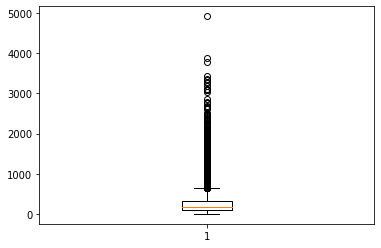

In [246]:
# The feature "dur" has a lot of outliers.
plt.boxplot(df['dur'])

In [247]:
df['dur'].shape

(45211,)

1. There is lot of outliers present
2. Will deal with the outlier

**IQR**

In [248]:
# IQR approach

Q1=df['dur'].quantile(0.25)
Q3=df['dur'].quantile(0.75)

iqr=Q3-Q1

lower_limit=Q1-1.5*iqr
upper_limit=Q3+1.5*iqr

lower_limit, upper_limit

(-221.0, 643.0)

In [249]:
outlier=(df['dur'] < lower_limit) | (df['dur']>upper_limit)
df1=df[~outlier]

In [250]:
df1['dur'].shape

(41976,)

**Z-Score**

In [145]:
'''# Z-score approach
# Removing outliers

import copy             #This line of code imports the copy module and creates a deep copy of the df dataframe, assigning it to a new variable df1
df1 = copy.deepcopy(x=df)

# Z score
from scipy import stats
def z_score(df_col):              # Defining function
     # print(df1.shape) 
     global df1                                      
     z = np.abs(stats.zscore(df1[df_col]))            #Calculating the Z_score by stats module
     threshold = 3                            #Setting the threshold values as 3, the any value greater than threshold value considered as outlier
     
     # Position of the outlier
     # print(np.where(z > 3))]
     df1=df1[(z< 3)]                   # resetting the index of the values less than threshold value
     df1.reset_index(drop=True,inplace=True)
     return df1

df1 = z_score('dur')              # calling function
df1.shape      

# Here can see the after removing we outliers the shape '''

(44248, 11)

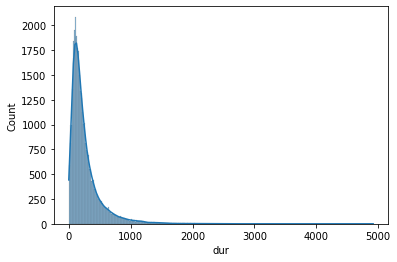

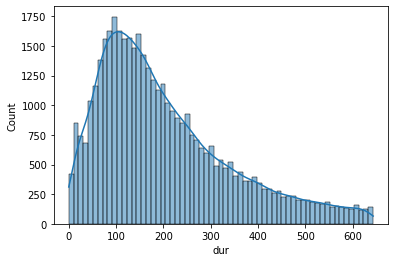

In [251]:
sns.histplot(df['dur'], kde=True)
plt.show()
sns.histplot(df1['dur'], kde=True)
plt.show()

# Here can see the difference of plot with outliers and without outliers

**age column**

<Axes: >

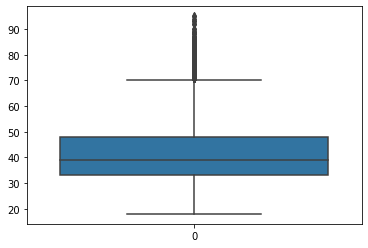

In [252]:
# Above same things wil apply for age column also
sns.boxplot(df['age'])

In [253]:
df['age'].shape

(45211,)

1. age column also have some of outliers are present 

In [254]:
# IQR approach
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)

iqr=Q3-Q1

lower_limit=Q1-1.5*iqr
upper_limit=Q3+1.5*iqr

lower_limit, upper_limit

(10.5, 70.5)

In [255]:
outlier=(df['age'] < lower_limit) | (df['age']>upper_limit)
df1=df[~outlier]

In [256]:
df1['age'].shape

(44724,)

In [ ]:
'''
#Z-score approach

df1 = z_score('age')
df1.shape

# Calling the function
# The outliers are removed '''

(43874, 11)

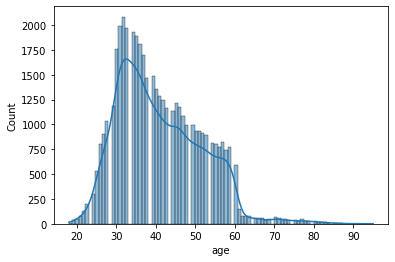

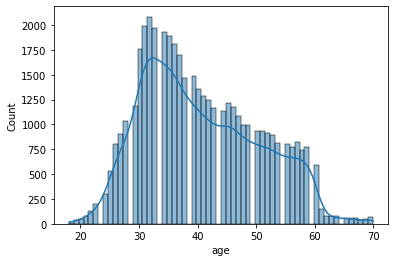

In [257]:
sns.histplot(df['age'], kde=True)
plt.show()
sns.histplot(df1['age'], kde=True)
plt.show()

#Comparing the original and after removing outliers

**day column**

<Axes: >

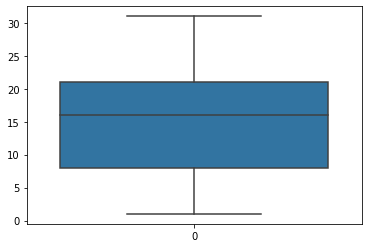

In [258]:
# will see the day column also

sns.boxplot(df['day'])

1. Here clearly we can see there is no outlier present


**num_calls column**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f406b17c250>,
 'caps': [<matplotlib.lines.Line2D at 0x7f406b17c790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f406b1a2f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f406b17ccd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f406b17cf70>],
 'means': []}

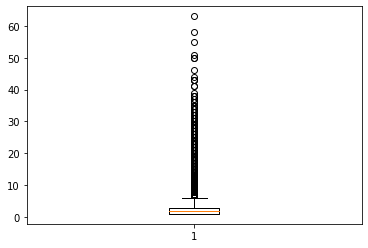

In [259]:
# Will Observe the "num_calls"
plt.boxplot(df['num_calls'])

In [260]:
df['num_calls'].shape

(45211,)

There are the outliers

In [261]:
# IQR approach
Q1=df['num_calls'].quantile(0.25)
Q3=df['num_calls'].quantile(0.75)

iqr=Q3-Q1

lower_limit=Q1-1.5*iqr
upper_limit=Q3+1.5*iqr

lower_limit, upper_limit

(-2.0, 6.0)

In [262]:
outlier=(df['num_calls'] < lower_limit) | (df['num_calls']>upper_limit)
df1=df[~outlier]

In [263]:
df1['num_calls'].shape

(42147,)

In [ ]:
'''# Removing the outliers
# calling the function
df1 = z_score('num_calls')
df1.shape'''

(43047, 11)

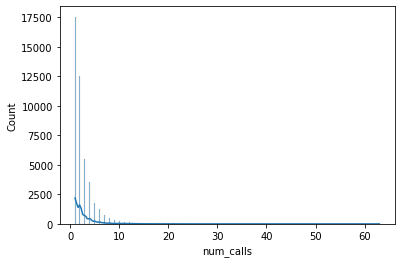

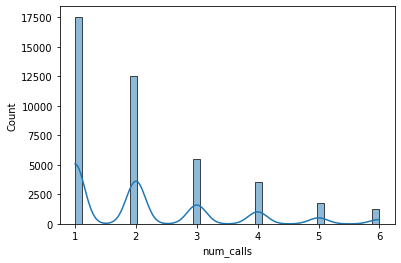

In [264]:
# Univariet analysis
sns.histplot(df['num_calls'], kde=True)
plt.show()
sns.histplot(df1['num_calls'], kde=True)
plt.show()

In [265]:
# Copying the dataset after removing the outliers

df=df1

<Axes: >

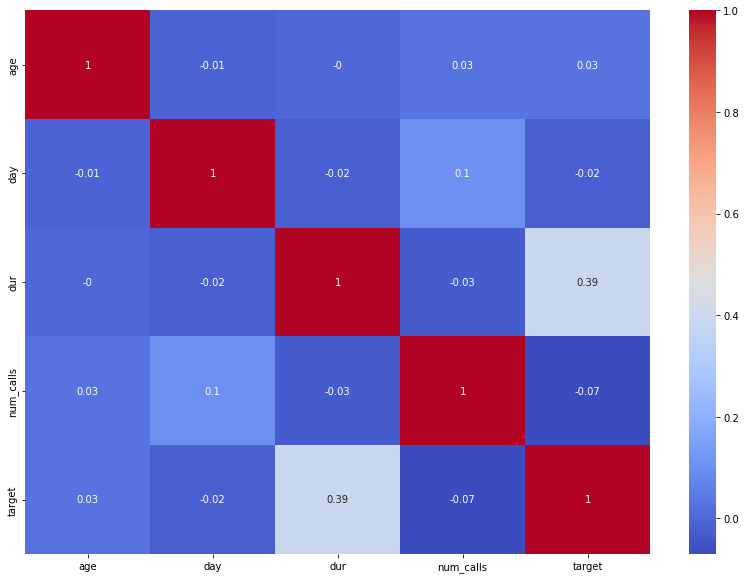

In [266]:
# Checking the correlation 

plt.figure(figsize=(14,10))
sns.heatmap((df.corr().round(2)),annot=True,cmap='coolwarm')
# No Linear Correlation found

**Encoding the Categorical data**

1. We use one hot encoding when we have categorical variables with more than two categories, and we want to represent them as binary variables (0 or 1) in order to use them as input features in a machine learning model.
2.  One hot encoding creates a new binary column for each unique category in the original column.


1. We use label encoding when we have categorical variables with two or more categories, and we want to encode them as integer values. 
2.Label encoding assigns a unique integer value to each unique category in the original column.


In [277]:
# Encoding the Categorical features


df = pd.get_dummies(df, columns=['job','marital','education_qual','call_type','mon','prev_outcome'])

df

,age,day,dur,num_calls,target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success
0,58,5,261,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,44,5,151,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,33,5,76,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,47,5,92,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,33,5,198,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,977,3,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
45207,71,17,456,2,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
45208,72,17,1127,5,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45209,57,17,508,4,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


# **Checking Imbalancing  of data**

**The imbalance dataset is refers to as 70% of data is belongs to one class**

(array([37019.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5128.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

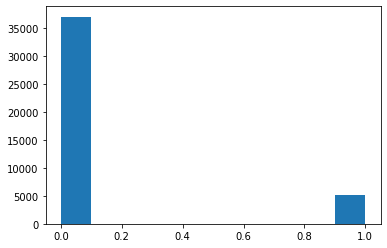

In [218]:
plt.hist(df['target'])

# Here we can see that class "0" as the more than 80% of data
# So that the data is imbalance, need to be resample the data 

#**Splitting the Data**

In [278]:
from sklearn.model_selection import train_test_split

X=df.drop(['target'],axis=1).values
y= df['target'].values

#X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

#**Handling Imabalance data**

In [279]:
# Resampling the data by ''Synthetic over_sampling technique''

from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_resampl,y_resample=sm.fit_resample(X,y)

In [280]:
X_train,X_test,y_train,y_test=train_test_split(X_resampl,y_resample, test_size=0.2, random_state=42)

**Scalling**

In [311]:
# import model
from sklearn.preprocessing import StandardScaler

scaled_df=StandardScaler()
scaled_df.fit(X_train)
x_train=scaled_df.transform(X_train)
x_test=scaled_df.transform(X_test)

# **LogisticRegression Model**

**Model fit**

In [282]:
# Importing library
from sklearn.linear_model import LogisticRegression

# Fit model
lr=LogisticRegression()
lr.fit(x_train,y_train)

lr.score(x_test,y_test)


0.9399648838465694

In [283]:
from sklearn.metrics import roc_auc_score

y_pred=lr.predict(x_test)

roc_auc_score(y_pred,y_test)

0.9420871988764142

In [284]:
print('Accuracy is :', accuracy_score(y_pred,y_test))
print('AUROC score is :', roc_auc_score(y_pred,y_test))

Accuracy is : 0.9399648838465694
AUROC score is : 0.9420871988764142


#**Decision Tree Model**

In [285]:
# Library import
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.9249054565099946

In [286]:
y_pred=tree.predict(x_test)

roc_auc_score(y_test,y_pred)

0.9249054565099947

In [287]:
print("Accuracy score :", accuracy_score(y_pred,y_test))
print('AUROC score :', roc_auc_score(y_test,y_pred))

Accuracy score : 0.9249054565099946
AUROC score : 0.9249054565099947


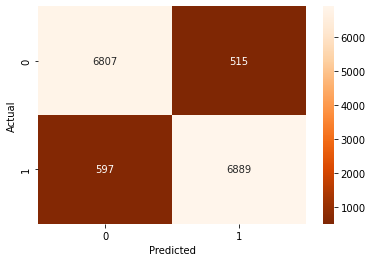

In [288]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, cmap='Oranges_r', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#**Decision Tree Model by Hyper Parameter tuning**

In [289]:
# Fit model
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(max_depth=4)
tree.fit(x_train,y_train)
tree.score(x_test,y_test)


# Depth of the tree is the Hyper Parameter max_depth
# I have set Depth parameter as 4

0.8329281469475959

In [290]:
y_pred=tree.predict(x_test)

roc_auc_score(y_test,y_pred)

0.8329281469475959

In [291]:
print('Acuuracy score :',accuracy_score(y_test,y_pred))
print('AUROC score :', roc_auc_score(y_test,y_pred))

Acuuracy score : 0.8329281469475959
AUROC score : 0.8329281469475959


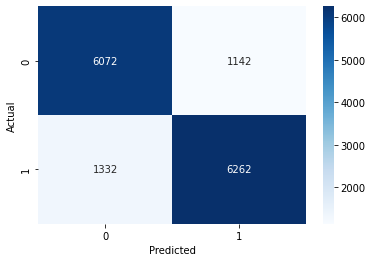

In [292]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

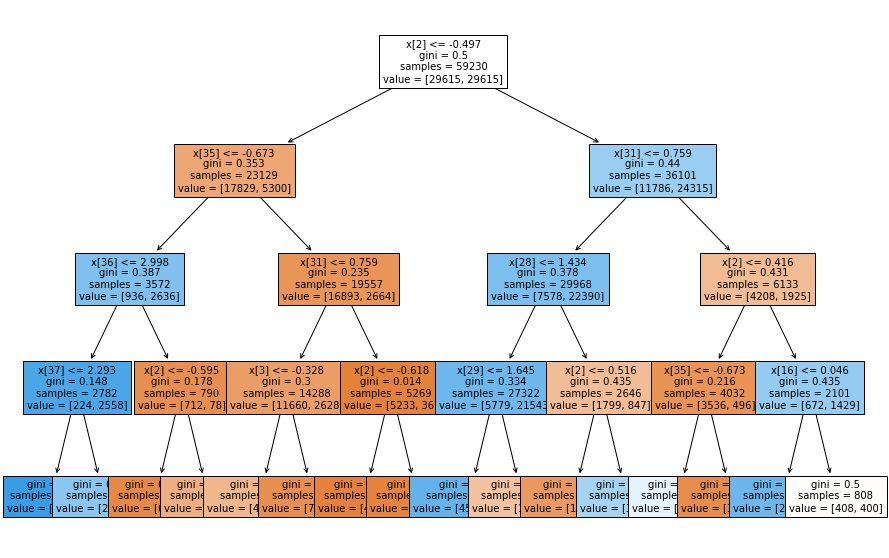

In [293]:
from sklearn.tree import plot_tree

# Plot the decision tree
fig, ax = plt.subplots(figsize=(15,10))
plot_tree(tree, fontsize=10,filled=True, ax=ax)
plt.show()

#**RandomForest Model**

In [294]:
# Fit model
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9421258779038357

In [295]:
y_pred=rf.predict(x_test)

roc_auc_score(y_test,y_pred)
# AUROC Score

0.9421258779038358

In [296]:
accuracy_score(y_pred,y_test)
# Acuuracy score 

0.9421258779038357

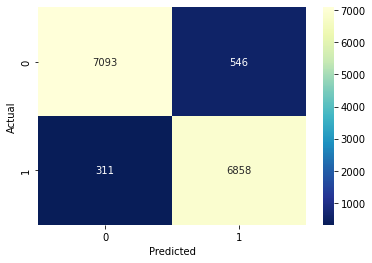

In [297]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, cmap='YlGnBu_r', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#**Feature Importance**

Here we get Which feature is most important for our predictions

In [298]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df, importances)]

# Sort the feature importances by most important first
# Descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True) #list sorted based on the second element (importance value) of each tuple

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: dur                  Importance: 0.25
Variable: mon_sep              Importance: 0.09
Variable: mon_mar              Importance: 0.07
Variable: age                  Importance: 0.06
Variable: day                  Importance: 0.05
Variable: job_admin.           Importance: 0.04
Variable: num_calls            Importance: 0.03
Variable: marital_divorced     Importance: 0.03
Variable: marital_single       Importance: 0.03
Variable: education_qual_primary Importance: 0.03
Variable: education_qual_secondary Importance: 0.03
Variable: mon_jan              Importance: 0.03
Variable: job_housemaid        Importance: 0.02
Variable: job_student          Importance: 0.02
Variable: job_unemployed       Importance: 0.02
Variable: marital_married      Importance: 0.02
Variable: mon_apr              Importance: 0.02
Variable: mon_jul              Importance: 0.02
Variable: mon_may              Importance: 0.02
Variable: prev_outcome_failure Importance: 0.02
Variable: target               Imp

**Here Can observe that the dur, age, day, mon,  features are contributing more for prediction**

#**DecisionTree Model with Important feature**

In [299]:
# Spltting the data by important features

X1=df[['dur','day', 'mon_sep','mon_mar','age']].values
y1=df['target'].values

#X_train,X_test,y_train,y_test=train_test_split(X1,y1, test_size=0.2, random_state=42)

In [300]:
from imblearn.over_sampling import SMOTE
st=SMOTE()

X_resample,y_resample=st.fit_resample(X1,y1)


In [301]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1, test_size=0.2, random_state=42)

In [302]:
# Fit model

dec=DecisionTreeClassifier(max_depth=4)
dec.fit(X_train,y_train)
dec.score(X_test,y_test)

0.8896797153024911

In [303]:
# Getting scores
y_pred1=dec.predict(X_test)
print('Accuracy_scor:',accuracy_score(y_pred1,y_test))
print('Auroc_score:',roc_auc_score(y_pred1,y_test))

# Here can observe that AUROC and accuracy got same as without feature importance

Accuracy_scor: 0.8896797153024911
Auroc_score: 0.7502417352115556


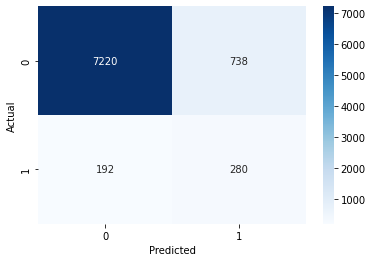

In [304]:
cm=confusion_matrix(y_pred1,y_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#confusion mat

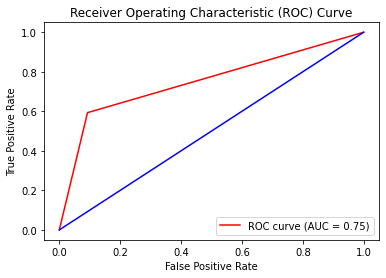

In [305]:
# Import libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test: true labels of the data
# y_pred: predicted probability scores of the positive class
fpr, tpr, thresholds = roc_curve(y_pred1,y_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='red', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **RandomForest Model with important features**

In [306]:
# Fit model by important features
from sklearn.ensemble import RandomForestClassifier

rff=RandomForestClassifier()
rff.fit(X_train,y_train)
rff.score(X_test,y_test)

0.8760379596678529

In [307]:
y_pred2=rff.predict(X_test)
print('Accuracy_scor:',accuracy_score(y_pred2,y_test))
print('Auroc_score:',roc_auc_score(y_pred2,y_test))

# Getting scores 

Accuracy_scor: 0.8760379596678529
Auroc_score: 0.6933130337331911


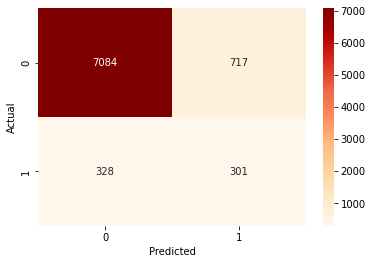

In [309]:
cm=confusion_matrix(y_pred2,y_test)
sns.heatmap(cm, annot=True, cmap='OrRd', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **XgBoost Model**

In [312]:
# The model without any feature importance

import xgboost as xgb

boost=xgb.XGBClassifier(learning_rate=0.5, n_estimator=100)
boost.fit(x_train,y_train)
boost.score(x_test,y_test)

[20:45:24] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



0.8854092526690391

In [313]:
# Getting scorefrom model

y_pred=boost.predict(x_test)

print('Accuracy_scor:',accuracy_score(y_pred,y_test))
print('Auroc_score:',roc_auc_score(y_pred,y_test))

Accuracy_scor: 0.8854092526690391
Auroc_score: 0.7296659476258132


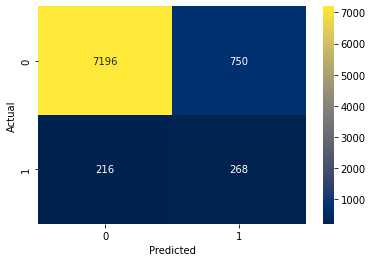

In [314]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, cmap='cividis', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

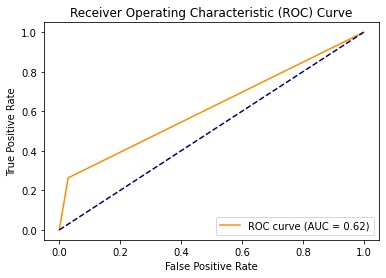

In [315]:
# Import libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test: true labels of the data
# y_pred: predicted probability scores of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#**XGBoost Model with imortant features**

In [316]:
#Splitting data

X1=df[['dur','day', 'mon_sep','mon_mar','age']].values
y1=df['target'].values

#X_train,X_test,y_train,y_test=train_test_split(X1,y1, test_size=0.2, random_state=42)

In [317]:
# Fit model

import xgboost as xgb

boost1=xgb.XGBClassifier(learning_rate=0.5, n_estimator=100)
boost1.fit(X_train,y_train)
boost1.score(X_test,y_test)

[20:45:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



0.8854092526690391

In [318]:
# Get scores
y_pred=boost1.predict(X_test)

print('Accuracy_score:',accuracy_score(y_pred,y_test))
print('Auroc_score:',roc_auc_score(y_pred,y_test))

Accuracy_score: 0.8854092526690391
Auroc_score: 0.7296659476258132


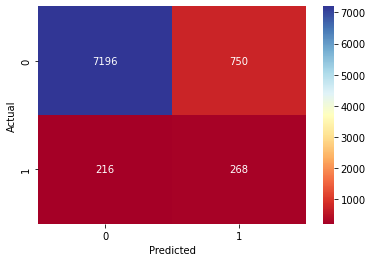

In [319]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, cmap='RdYlBu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

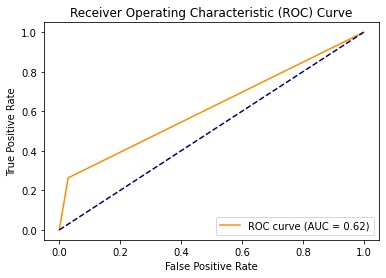

In [320]:
# Import libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test: true labels of the data
# y_pred: predicted probability scores of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()